In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [88]:
import warnings
warnings.filterwarnings('ignore')

Source and Citation
Source: Statistics Canada, 2016 Census of Population.

Statistics Canada. 2017. Census Profile. 2016 Census. 
Statistics Canada Catalogue no. 98-316-X2016001. Ottawa. Released November 29, 2017.

https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/index.cfm?Lang=E

In [89]:
# Load data
# Data source Statistics Cana
df = pd.read_csv('Resources/cleaned_data_sep21.csv')
df.head()

,ID,Aboriginal,Age,Major field of study,Years of Education,Provincial Minimum Wage,Census Metropolitan Area,Part Time Job,Generation Status,Married,Industry Sectors,Occupation Major Groups,Occupation Broad Categories,Sex,Visible Minority,Wages
0,218995,0,47,0,18,11.20,835,0,1,1,8,6,2,1,1,2000
1,671467,0,37,0,14,10.45,933,0,3,1,13,21,7,0,0,28000
2,112607,0,27,1,13,10.75,462,0,2,1,12,10,3,1,1,36000
3,153693,0,52,0,14,11.25,535,0,1,1,10,5,2,1,1,80000
4,468158,0,42,0,9,11.25,535,1,2,1,7,22,7,0,0,11000


In [90]:
df.shape

(11256, 16)

In [91]:
df.columns

Index(['ID', 'Aboriginal', 'Age', 'Major field of study', 'Years of Education',
       'Provincial Minimum Wage', 'Census Metropolitan Area', 'Part Time Job',
       'Generation Status', 'Married', 'Industry Sectors',
       'Occupation Major Groups', 'Occupation Broad Categories', 'Sex',
       'Visible Minority', 'Wages'],
      dtype='object')

In [92]:
df.corr()

,ID,Aboriginal,Age,Major field of study,Years of Education,Provincial Minimum Wage,Census Metropolitan Area,Part Time Job,Generation Status,Married,Industry Sectors,Occupation Major Groups,Occupation Broad Categories,Sex,Visible Minority,Wages
ID,1.000000,-0.002217,-0.013470,-0.012679,0.000378,-0.017712,-0.004793,0.004342,-0.002399,-0.000723,0.012286,0.011214,0.008236,0.003339,0.005584,-0.013731
Aboriginal,-0.002217,1.000000,-0.018756,-0.067985,-0.127771,-0.038453,0.195247,-0.002264,0.202773,-0.042703,0.039140,0.082007,0.076428,-0.012523,-0.163805,-0.028240
Age,-0.013470,-0.018756,1.000000,0.009909,-0.017403,0.003447,-0.014927,-0.190686,-0.081833,0.217109,-0.001438,-0.018736,-0.003439,0.012881,0.003231,0.183878
Major field of study,-0.012679,-0.067985,0.009909,1.000000,0.267830,0.010149,-0.069189,-0.076222,-0.170174,0.111841,-0.036306,-0.050097,-0.013877,0.169978,0.112580,0.116429
Years of Education,0.000378,-0.127771,-0.017403,0.267830,1.000000,0.016268,-0.103733,-0.078390,-0.181756,0.169201,-0.008466,-0.188141,-0.097765,-0.057038,0.104605,0.160420
Provincial Minimum Wage,-0.017712,-0.038453,0.003447,0.010149,0.016268,1.000000,-0.270355,-0.001290,-0.108268,-0.025878,-0.022060,0.008237,0.004224,-0.009905,0.099482,0.034425
Census Metropolitan Area,-0.004793,0.195247,-0.014927,-0.069189,-0.103733,-0.270355,1.000000,0.000875,0.182732,0.031533,0.006469,0.066854,0.045040,0.000382,-0.153946,0.011157
Part Time Job,0.004342,-0.002264,-0.190686,-0.076222,-0.078390,-0.001290,0.000875,1.000000,-0.008432,-0.206009,0.024348,0.046425,0.007053,-0.159694,0.045804,-0.277488
Generation Status,-0.002399,0.202773,-0.081833,-0.170174,-0.181756,-0.108268,0.182732,-0.008432,1.000000,-0.038420,-0.042155,-0.058153,-0.067931,-0.040927,-0.755961,0.003918
Married,-0.000723,-0.042703,0.217109,0.111841,0.169201,-0.025878,0.031533,-0.206009,-0.038420,1.000000,-0.086934,-0.112573,-0.097850,0.139096,-0.031329,0.155901


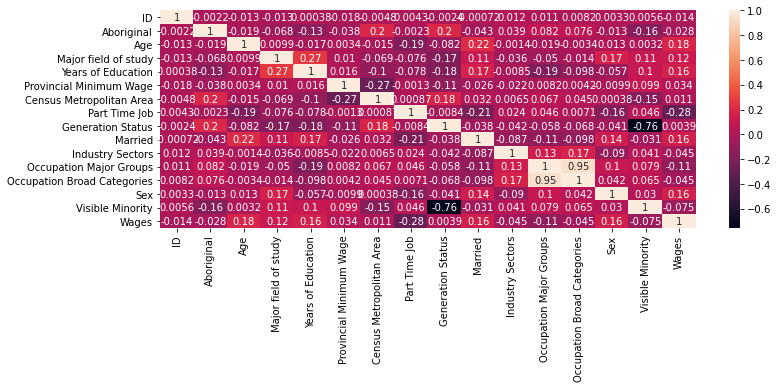

In [93]:
# Heat Map
sns.heatmap(df.corr(), annot=True);

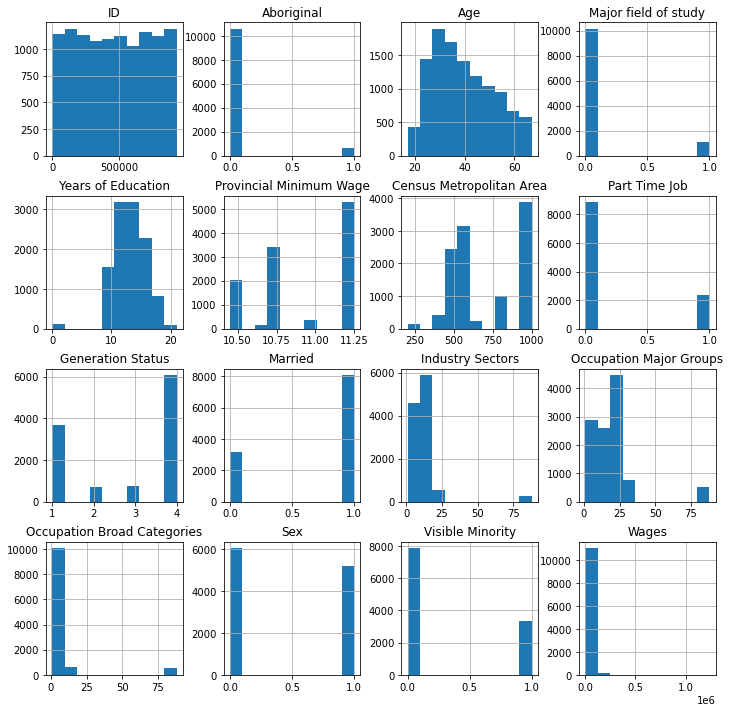

In [94]:
# Histogram
df.hist(figsize=(12,12), layout=(4,4), sharex=False);

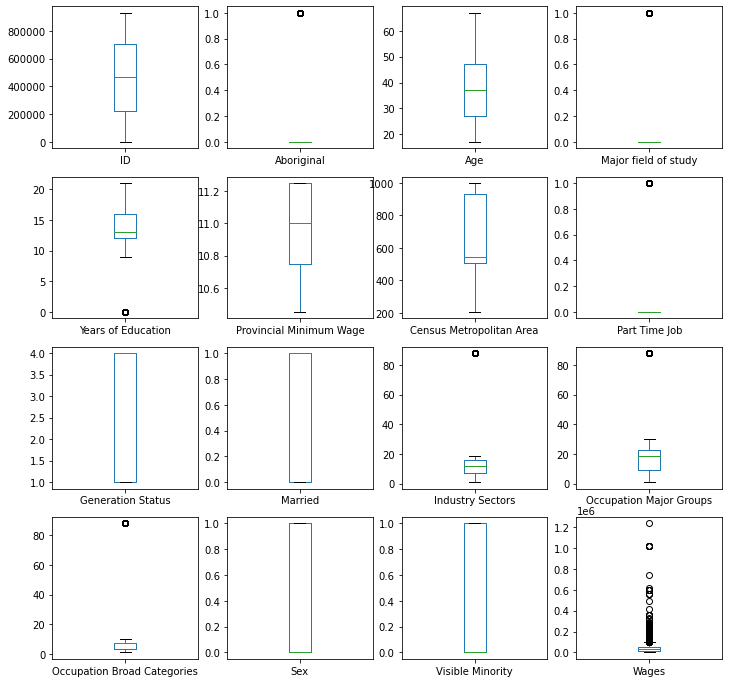

In [95]:
# BoxPlot
df.plot(kind='box', figsize=(12,12), layout=(4,4), sharex=False, subplots=True);

# Model Building

## Feature Scaling

In [96]:
X = df.drop(['Wages'], axis=1)
y = df['Wages']

In [97]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [98]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,ID,Aboriginal,Age,Major field of study,Years of Education,Provincial Minimum Wage,Census Metropolitan Area,Part Time Job,Generation Status,Married,Industry Sectors,Occupation Major Groups,Occupation Broad Categories,Sex,Visible Minority,Wages
0,2728,0,6,0,8,6,19,0,0,1,7,5,1,1,1,2
1,8009,0,4,0,4,0,20,0,2,1,12,20,6,0,0,28
2,1370,0,2,1,3,4,3,0,1,1,11,9,2,1,1,36
3,1916,0,7,0,4,7,7,0,0,1,9,4,1,1,1,80
4,5672,0,5,0,1,7,7,1,1,1,6,21,6,0,0,11


In [99]:
ss = StandardScaler().fit(df1.drop('Wages', axis=1))

In [100]:
X = ss.transform(df1.drop('Wages', axis=1))
y = df['Wages']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Logistic Regression

In [114]:
# Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier


LogisticRegression(random_state=1)

In [115]:
# Fit(train) or model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [121]:
# Make Predictions
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual":y_test})

,Prediction,Actual
2252,17000,150000
9500,22000,29000
218,29000,42000
1845,44000,44000
795,44000,34000
...,...,...
9772,3000,9000
653,10000,2000
9117,27000,13000
2269,47000,32000


In [122]:
# Validate the model using the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

ValueError: Found input variables with inconsistent numbers of samples: [2814, 7879]

# Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training data: 1.000
Accuracy on test data: 0.019


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X,y)
